In [2]:
import tensorboard as tb
from matplotlib import pyplot as plt
from dl_framework.experiment_data import experiment_data
import numpy as np

In [88]:
vww_10_data = experiment_data('tb_data/staging/fed_vww_255ed/')
vww_2_data = experiment_data('tb_data/federated/fl_vww_successful/')

In [197]:
cifar_10_data = experiment_data('tb_data/cifar_many_nodes/fed_ic_fcd86/')
cifar_2_data = experiment_data('tb_data/federated/fl_cifar_successful/')

In [149]:
ad_10_data = experiment_data('tb_data/ad_tennodes/fed_ad_4a7d8/')
ad_2_data = experiment_data('tb_data/ad_federated/fed_ad_success/')

In [18]:

def getmeanstd_of_vww_data(experiment_data):

    trainacc_value_list = [] 
    testacc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'trainacc' in key:
            trainacc_value_list.append(tb_plot.value)
            steps = tb_plot.step

        if 'testacc' in key:
            testacc_value_list.append(tb_plot.value)

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)

    trainacc_value_list = np.array(trainacc_value_list)
    testacc_value_list = np.array(testacc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_trainacc = [trainacc_value_list.mean(axis=0),trainacc_value_list.std(axis=0)] 
    meanstd_testacc = [testacc_value_list.mean(axis=0),testacc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_trainacc,meanstd_testacc,meanstd_loss,steps

meanstd_vww10 = getmeanstd_of_vww_data(vww_100_data)
meanstd_vww2 = getmeanstd_of_vww_data(vww_10_data)
meanstd_cifar10 = getmeanstd_of_vww_data(cifar_10_data)
meanstd_cifar2 = getmeanstd_of_vww_data(cifar_2_data)
meanstd_ks10 = getmeanstd_of_vww_data(ks_10_data)
meanstd_ks2 = getmeanstd_of_vww_data(ks_2_data)

NameError: name 'vww_100_data' is not defined

In [ ]:
ad_steps = None

def getmeanstd_of_ad_data(experiment_data):
    auc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'auc' in key:
            if len(key) != 15:
                continue
            print(f'{key}:{tb_plot.value.shape}')
            auc_value_list.append(tb_plot.value[:90])
            ad_steps = tb_plot.step[:90]

        if 'loss' in key:
            loss_value_list.append(tb_plot.value[:90])

    auc_value_list = np.array(auc_value_list,dtype=float)
    loss_value_list = np.array(loss_value_list,dtype=float)

    meanstd_auc = [auc_value_list.mean(axis=0),auc_value_list.std(axis=0)]  
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_auc,meanstd_loss,ad_steps

meanstd_ad10 = getmeanstd_of_ad_data(ad_10_data)
meanstd_ad2 = getmeanstd_of_ad_data(ad_2_data)


In [9]:
# Calculate mean and std

def get_std_interval(mean,std):
    return mean+std,mean-std


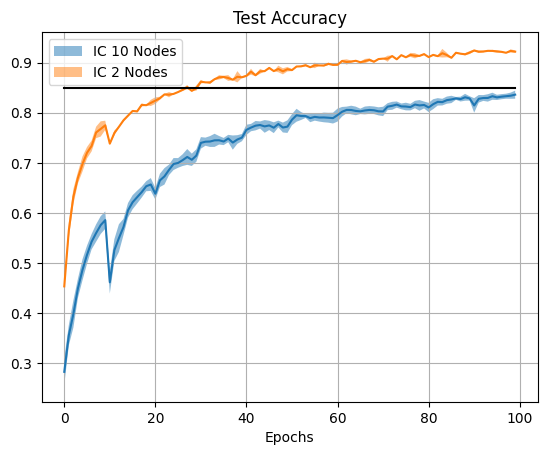

In [201]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.5,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

steps = meanstd_cifar10[-1]
plot_withci(meanstd_cifar10[1],name='IC 10 Nodes',steps=steps)
plot_withci(meanstd_cifar2[1],name='IC 2 Nodes',steps=steps)
plt.title('Test Accuracy')
plt.legend()
plt.grid('both')
plt.plot(steps,[0.85]*len(steps),c='black')

In [172]:
print(ad_steps)

None


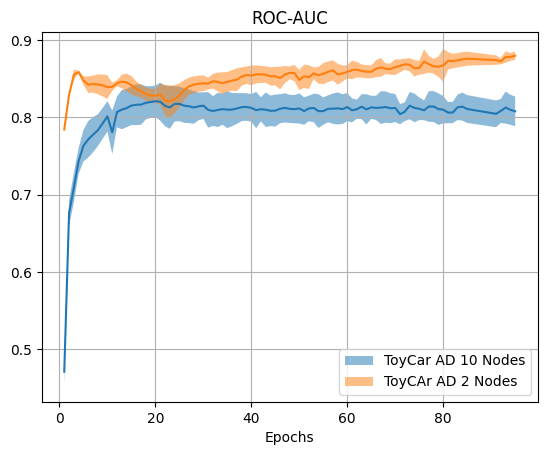

In [183]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.5,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

plot_withci(meanstd_ad10[0],name='ToyCar AD 10 Nodes',steps=meanstd_ad10[2])
plot_withci(meanstd_ad2[0],name='ToyCAr AD 2 Nodes',steps=meanstd_ad10[2])
plt.title('ROC-AUC')
plt.legend()
plt.grid()

In [7]:
import os
ks_epochsweep_data = []
root = 'tb_data/fed_ks_local_epoch_sweep/'
for i in os.listdir(root):
    print(root+i)
    ks_epochsweep_data.append(experiment_data(root+i))

def getmeanstd_of_data(experiment_data):

    trainacc_value_list = [] 
    testacc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'trainacc' in key:
            trainacc_value_list.append(tb_plot.value)
            steps = tb_plot.step

        if 'testacc' in key:
            testacc_value_list.append(tb_plot.value)

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)

    trainacc_value_list = np.array(trainacc_value_list)
    testacc_value_list = np.array(testacc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_trainacc = [trainacc_value_list.mean(axis=0),trainacc_value_list.std(axis=0)] 
    meanstd_testacc = [testacc_value_list.mean(axis=0),testacc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_trainacc,meanstd_testacc,meanstd_loss,steps

meanstd_ks_epochsweep_data = [getmeanstd_of_data(i) for i in ks_epochsweep_data]

In [28]:
meanstd_ks_epochsweep_data[0][3]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

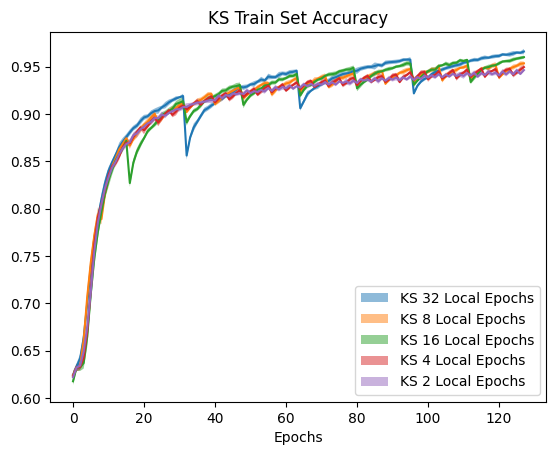

In [35]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.5,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

steps = meanstd_ks_epochsweep_data[0][3]

plot_withci(meanstd_ks_epochsweep_data[0][0],name='KS 32 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[1][0],name='KS 8 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[2][0],name='KS 16 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[3][0],name='KS 4 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[4][0],name='KS 2 Local Epochs',steps=steps)
plt.title('KS Train Set Accuracy')
plt.legend()
plt.grid()

In [1]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.2,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

steps = meanstd_ks_epochsweep_data[0][3]

plot_withci(meanstd_ks_epochsweep_data[0][1],name='KS 32 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[1][1],name='KS 8 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[2][1],name='KS 16 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[3][1],name='KS 4 Local Epochs',steps=steps)
plot_withci(meanstd_ks_epochsweep_data[4][1],name='KS 2 Local Epochs',steps=steps)
plt.title('KS Test Set Accuracy @ 10 nodes')
plt.legend()
plt.grid()
plt.grid()
plt.plot(steps,[0.9]*len(steps),c='black')
plt.ylim(0.75,0.93)
plt.show()

NameError: name 'meanstd_ks_epochsweep_data' is not defined

In [6]:
import os
ad_epochsweep_data = []
root = 'tb_data/fed_ad_local_epoch_sweep/'
for i in os.listdir(root):
    print(root+i)
    ad_epochsweep_data.append(experiment_data(root+i))

tb_data/fed_ad_local_epoch_sweep/fed_ad_lcl_8_2f9f1
tb_data/fed_ad_local_epoch_sweep/fed_ad_lcl_2_9ee82
tb_data/fed_ad_local_epoch_sweep/fed_ad_lcl_4_78160
tb_data/fed_ad_local_epoch_sweep/fed_ad_lcl_16_c018d
tb_data/fed_ad_local_epoch_sweep/fed_ad_lcl_32_a157e


In [9]:

def getmeanstd_of_data(experiment_data):

    auc_value_list = [] 
    loss_value_list = []
    min_len = 100000
    short_key = ''
    for key,tb_plot in experiment_data.data.items():
        if 'auc' in key:
            auc_value_list.append(tb_plot.value)
            steps = tb_plot.step
        
            if len(tb_plot.value) < min_len:
                min_len = len(tb_plot.value)  
                short_key = key

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)
            
            if len(tb_plot.value) < min_len:
                min_len = len(tb_plot.value)  
                short_key = key

    print(f'Smallest length: {min_len} from {short_key}')

    for i,r in enumerate(auc_value_list):
        auc_value_list[i] = auc_value_list[i][:min_len]
        loss_value_list[i] = loss_value_list[i][:min_len]
    steps = steps[:min_len]

    auc_value_list = np.array(auc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_auc = [auc_value_list.mean(axis=0),auc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_auc,meanstd_loss,steps

meanstd_ad_epochsweep_data = [getmeanstd_of_data(i) for i in ad_epochsweep_data]

Smallest length: 178 from data/node_1/loss
Smallest length: 162 from data/node_0/loss
Smallest length: 188 from data/node_7/loss
Smallest length: 182 from data/node_7/loss
Smallest length: 182 from data/node_2/loss


In [ ]:
def get_std_interval(mean,std):
    return mean+std,mean-std

def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.2,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

steps = meanstd_ad_epochsweep_data[1][2]

plot_withci(meanstd_ad_epochsweep_data[0][0],name='AD 8 Local Epochs',steps=meanstd_ad_epochsweep_data[0][2])
plot_withci(meanstd_ad_epochsweep_data[1][0],name='AD 2 Local Epochs',steps=meanstd_ad_epochsweep_data[1][2])
plot_withci(meanstd_ad_epochsweep_data[2][0],name='AD 4 Local Epochs',steps=meanstd_ad_epochsweep_data[2][2])
plot_withci(meanstd_ad_epochsweep_data[3][0],name='AD 16 Local Epochs',steps=meanstd_ad_epochsweep_data[3][2])
plot_withci(meanstd_ad_epochsweep_data[4][0],name='AD 32 Local Epochs',steps=meanstd_ad_epochsweep_data[4][2])
plt.title('AD Test Set AUC @ 10 nodes')
plt.legend()
plt.grid()
plt.grid()
plt.plot(steps,[0.85]*len(steps),c='black')
plt.ylim(0.6,0.875)
plt.show()

In [18]:
import os
ic_epochsweep_data = []
root = 'tb_data/fed_ic_local_epoch_sweep/'
for i in os.listdir(root):
    print(root+i)
    ic_epochsweep_data.append(experiment_data(root+i))

tb_data/fed_ic_local_epoch_sweep/fed_ic_lcl_8_df00b


tb_data/fed_ic_local_epoch_sweep/fed_ic_lcl_16_45763
tb_data/fed_ic_local_epoch_sweep/fed_ic_lcl_2_571b3
tb_data/fed_ic_local_epoch_sweep/fed_ic_lcl_32_7487b
tb_data/fed_ic_local_epoch_sweep/fed_ic_lcl_4_fb7f5


In [19]:
def getmeanstd_of_data(experiment_data):

    trainacc_value_list = [] 
    testacc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'trainacc' in key:
            trainacc_value_list.append(tb_plot.value)
            steps = tb_plot.step

        if 'testacc' in key:
            testacc_value_list.append(tb_plot.value)

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)

    trainacc_value_list = np.array(trainacc_value_list)
    testacc_value_list = np.array(testacc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_trainacc = [trainacc_value_list.mean(axis=0),trainacc_value_list.std(axis=0)] 
    meanstd_testacc = [testacc_value_list.mean(axis=0),testacc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_trainacc,meanstd_testacc,meanstd_loss,steps

meanstd_ic_epochsweep_data = [getmeanstd_of_data(i) for i in ic_epochsweep_data]

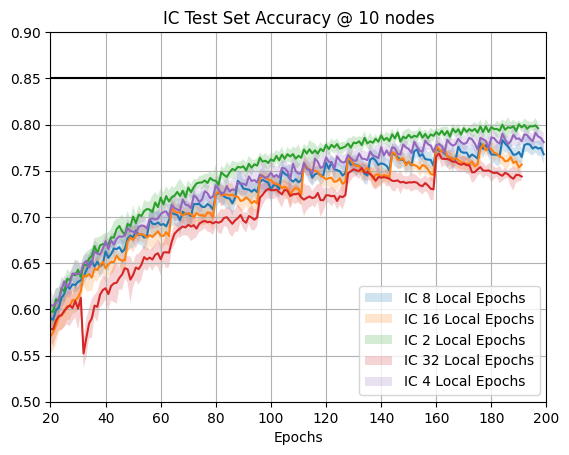

In [31]:
def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.2,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

toplot = meanstd_ic_epochsweep_data 

steps = toplot[0][3]

plot_withci(toplot[0][1],name='IC 8 Local Epochs',steps=toplot[0][3])
plot_withci(toplot[1][1],name='IC 16 Local Epochs',steps=toplot[1][3])
plot_withci(toplot[2][1],name='IC 2 Local Epochs',steps=toplot[2][3])
plot_withci(toplot[3][1],name='IC 32 Local Epochs',steps=toplot[3][3])
plot_withci(toplot[4][1],name='IC 4 Local Epochs',steps=toplot[4][3])
plt.title('IC Test Set Accuracy @ 10 nodes')
plt.legend()
plt.grid()
plt.grid()
plt.plot(steps,[0.85]*len(steps),c='black')
plt.ylim(0.5,0.9)
plt.xlim(20,200)
plt.show()

In [34]:
root = 'tb_data/cifar_210nodes_resnet/'
names = ['fed_ic_c244c','fed_ic_10_570da']
fed_resnet_ic = []
for i in names: 
    fed_resnet_ic.append(experiment_data(root+i))

In [35]:
def getmeanstd_of_data(experiment_data):

    trainacc_value_list = [] 
    testacc_value_list = []
    loss_value_list = []

    for key,tb_plot in experiment_data.data.items():
        if 'trainacc' in key:
            trainacc_value_list.append(tb_plot.value)
            steps = tb_plot.step

        if 'testacc' in key:
            testacc_value_list.append(tb_plot.value)

        if 'loss' in key:
            loss_value_list.append(tb_plot.value)

    trainacc_value_list = np.array(trainacc_value_list)
    testacc_value_list = np.array(testacc_value_list)
    loss_value_list = np.array(loss_value_list)

    meanstd_trainacc = [trainacc_value_list.mean(axis=0),trainacc_value_list.std(axis=0)] 
    meanstd_testacc = [testacc_value_list.mean(axis=0),testacc_value_list.std(axis=0)] 
    meanstd_loss = [loss_value_list.mean(axis=0),loss_value_list.std(axis=0)] 

    return meanstd_trainacc,meanstd_testacc,meanstd_loss,steps,testacc_value_list

meanstd_ic_epochsweep_data = [getmeanstd_of_data(i) for i in fed_resnet_ic]

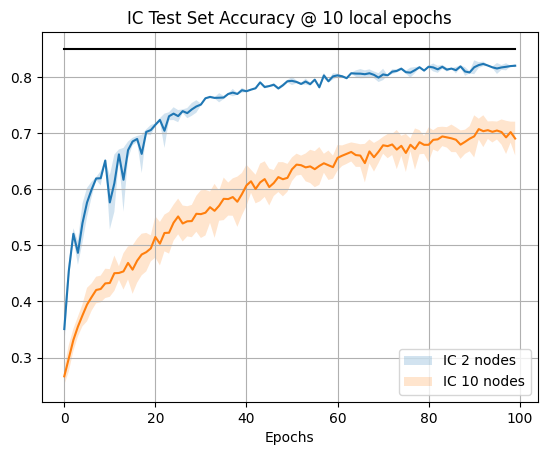

In [39]:
def get_std_interval(mean,std):
    return mean+std,mean-std

def plot_withci(meanstd_plot,name=None,steps=None):
    plt.fill_between(steps,*get_std_interval(meanstd_plot[0],meanstd_plot[1]),alpha=.2,label=name)
    plt.plot(steps,meanstd_plot[0])
    plt.grid()
    plt.xlabel('Epochs')

toplot = meanstd_ic_epochsweep_data 

# steps = toplot[3]

plot_withci(toplot[0][1],name='IC 2 nodes',steps=toplot[0][3])
plot_withci(toplot[1][1],name='IC 10 nodes',steps=toplot[1][3])
plt.title('IC Test Set Accuracy @ 10 local epochs')
plt.legend()
plt.grid()
plt.grid()
plt.plot(steps,[0.85]*len(steps),c='black')
plt.grid()
# plt.ylim(0.5,0.9)
# plt.xlim(20,200)
plt.show()